In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import struct
from datetime import time
ticks_per_sec = 10000
us_per_sec = 1000*1000
flight_data_path = '/home/unknown/Clubs/Launch/Misc/flight-data/2025/LOTUS'

In [3]:
fdf = pd.read_csv(flight_data_path+'/FeatherWeights/featherweight_downloaded.csv', index_col=0)
fdf['UTCTIME'] = pd.to_datetime(fdf['UTCTIME'])

In [69]:
loradf = pd.read_csv(flight_data_path+'/ControlFreak/CSVs/freaky_received_lora_packets.csv', index_col=0)
loradf.time = pd.to_datetime(loradf.time.map(lambda t : f"6/11/2025 {t}"))
loradf['altitude_ft'] = loradf['altitude'] * 3.28

In [111]:
slowdf = pd.read_csv(flight_data_path+'/ControlFreak/CSVs/freaky_slow.csv', index_col=0)

In [165]:
rdf = pd.read_csv(flight_data_path+'/ControlFreak/CSVs/freaky_received_lora_packets.csv', index_col=0)

In [173]:
press2alt(78.27)

2124.048241632159

In [172]:
rdf.iloc[65:]

,time,snr,rssi,payload_id,hours,latitude,longitude,altitude,speed,sats,temperature,voltage,pressure,flight_state
65,18:30:00,-15,-102,388,18,31.044298,-103.535080,894,0,12,35,8.156863,91.47,OnPad
66,18:30:30,-14,-101,388,18,31.044300,-103.535095,895,0,12,35,8.196078,91.46,OnPad
67,18:31:00,-15,-102,388,18,31.044300,-103.535095,896,0,12,35,8.156863,91.47,OnPad
68,18:31:30,-17,-103,388,18,31.044302,-103.535095,896,0,12,35,8.196078,91.47,OnPad
69,18:32:00,-16,-103,388,18,31.044302,-103.535095,897,0,12,35,8.156863,91.46,OnPad
70,18:32:43,-9,-95,388,18,31.041084,-103.535393,907,35,4,34,8.117647,67.33,InitialPump
71,18:33:29,-6,-93,388,18,31.039299,-103.537148,1893,16,9,33,8.117647,70.99,InitialPump
72,18:34:04,-9,-96,388,18,31.038647,-103.536591,1977,5,12,31,8.117647,74.60,InitialPump
73,18:34:30,1,-83,388,18,31.038977,-103.537163,2273,10,12,30,8.117647,78.27,InitialPump
74,18:35:00,-2,-86,388,18,31.038797,-103.536583,2136,3,12,29,8.117647,82.20,InitialPump


Text(0.38, 0.9, 'GPS AGL Apogee of 9084.3 meters')

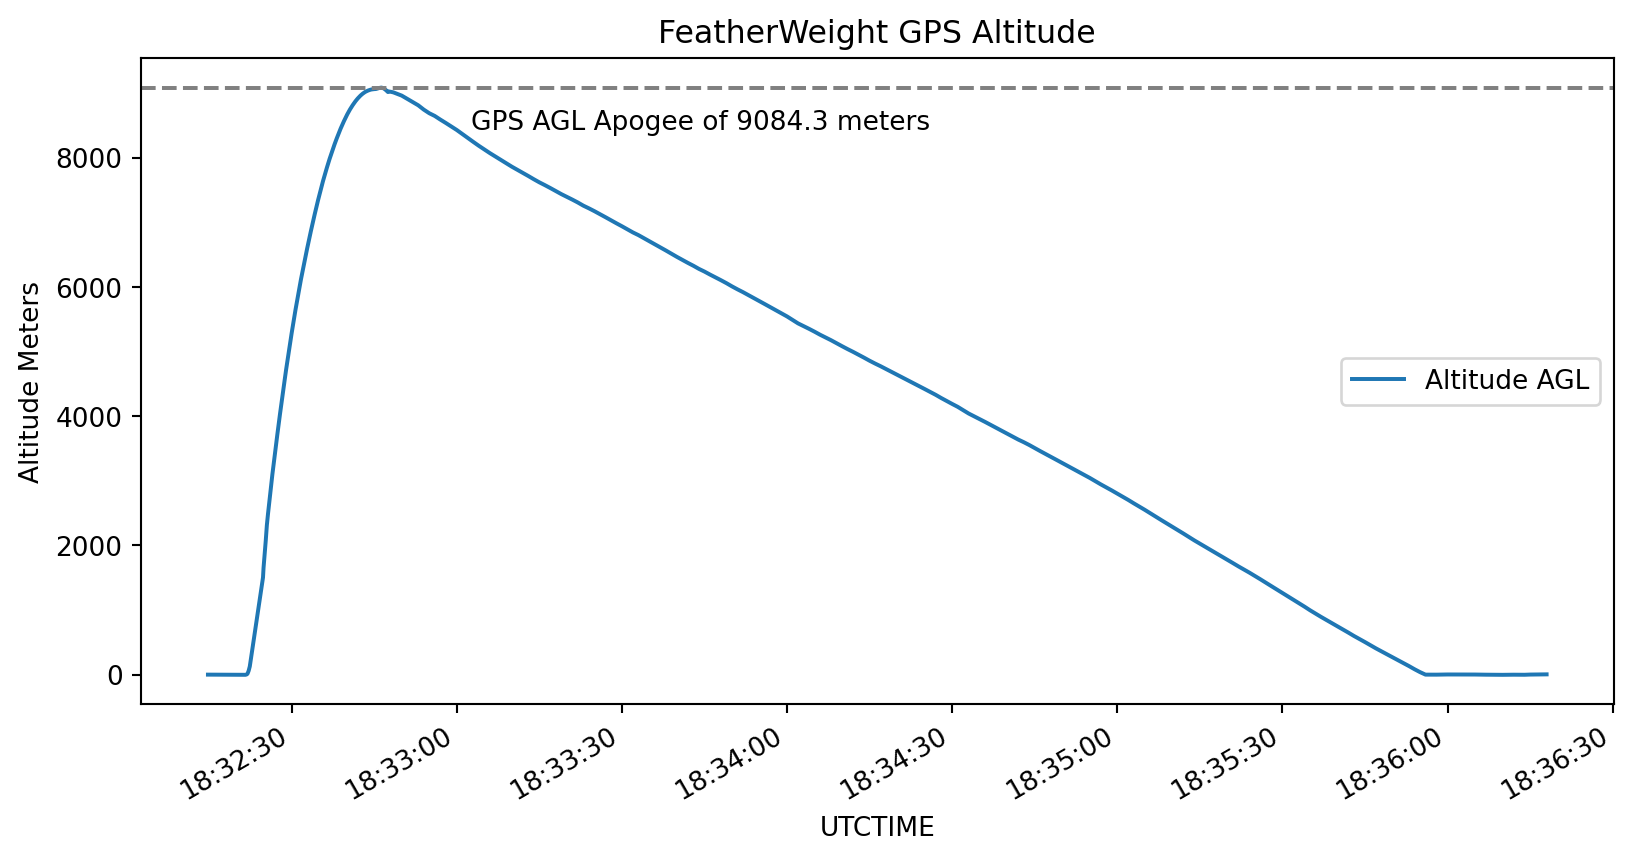

In [120]:
ax = fdf.set_index('UTCTIME')[['Altitude AGL']].plot(figsize=(10,5), title="FeatherWeight GPS Altitude", ylabel='Altitude Meters')
fig = ax.get_figure()
fig.set_dpi(190)
apogee, apogeeloc = fdf['Altitude AGL'].max(), fdf['Altitude AGL'].argmax()
ax.axhline(apogee, c='gray', linestyle='dashed')

plt.text(0.38, 0.9, f"GPS AGL Apogee of {apogee} meters", horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)

<Axes: >

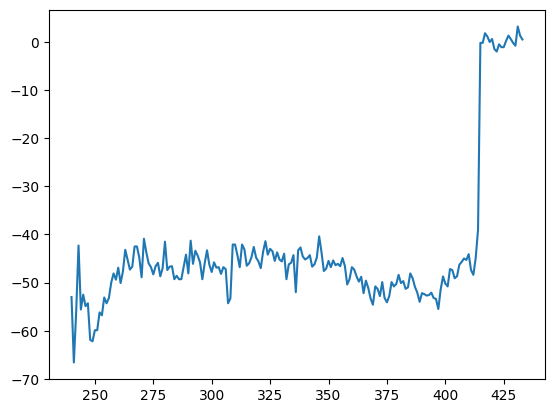

In [182]:
(fdf.ALT.diff() / fdf.UNIXTIME.diff()).iloc[240:].plot()

<Axes: >

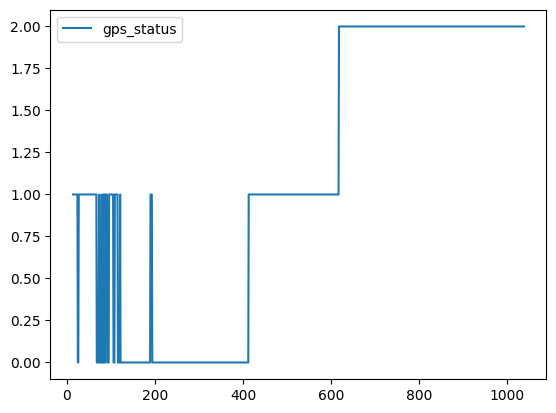

In [114]:
slowdf.iloc[14:][['gps_status']].plot()

In [127]:
single_rate = pd.read_csv('/home/unknown/Camera/single_rate.csv').set_index('timestamp')

In [130]:
def press2alt(P):
    return 44308 * (1-pow(P/101.325, 0.190284))

In [139]:
single_rate['alt'] = single_rate['press'].map(press2alt)

In [142]:
single_rate['seconds'] = single_rate.index / 1000000

In [149]:
single_rate

,press,temp,gx,gy,gz,ax,ay,az,alt,seconds,vel
timestamp,,,,,,,,,,,
2206974700,91.465561,35.781494,0.007101,-0.028481,0.011835,0.120239,-1.121635,-9.503094,854.745546,2206.9747,NaN
2206984700,91.470169,35.781494,0.018478,-0.032299,0.030924,0.117248,-1.083350,-9.475577,854.328979,2206.9847,0.460815
2206994700,91.470169,35.781494,0.009468,-0.021380,-0.010690,0.104685,-1.119242,-9.521041,854.328979,2206.9947,0.000000
2207004700,91.465561,35.781494,0.011377,-0.031383,0.002748,0.056829,-1.123430,-9.461818,854.745546,2207.0047,-0.460815
2207014700,91.474503,35.790649,0.010460,-0.025656,-0.011071,0.032901,-1.098903,-9.442077,853.937256,2207.0147,0.894165
...,...,...,...,...,...,...,...,...,...,...,...
2226028700,73.913330,35.895920,-0.148669,-0.087124,-2.501798,0.888933,0.468395,2.148156,2581.264338,2226.0287,-1.380157
2226038700,73.894089,35.891342,-0.149661,-0.112399,-2.501798,0.808175,0.058624,1.945962,2583.331502,2226.0387,-1.924133
2226048700,73.888031,35.895920,-0.162490,-0.063682,-2.501798,0.896112,0.471984,2.380260,2583.982396,2226.0487,-0.605774


In [153]:
single_rate['vel'] = single_rate.alt.diff() / single_rate.seconds.diff()

<Axes: xlabel='seconds'>

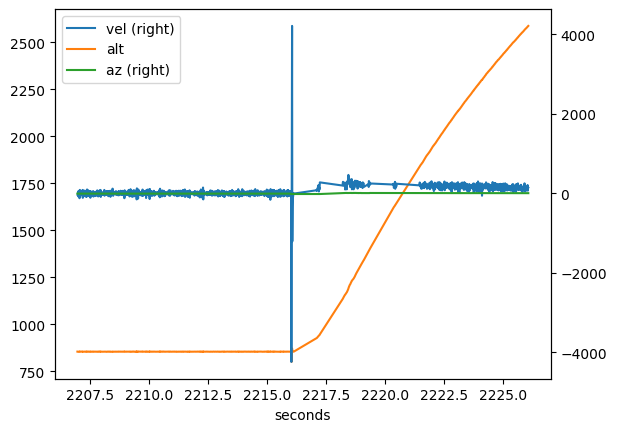

In [154]:
single_rate.set_index('seconds')[['vel', 'alt', 'az']].plot(secondary_y=['vel', 'az'])

In [157]:
from numpy import abs

<Axes: xlabel='timestamp'>

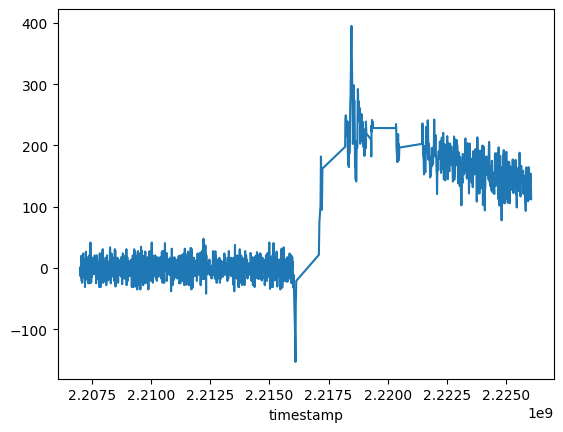

In [160]:
single_rate[abs(single_rate.vel)<1000 ].vel.rolling(3).mean().plot()

<Axes: xlabel='time'>

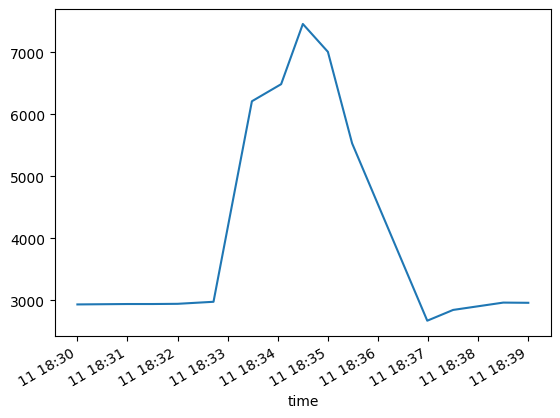

In [ ]:
loradf.set_index('time')['altitude_ft'].iloc[65:].plot()


In [93]:
slowdf.time = pd.to_datetime(slowdf.time.map(lambda s : f"6/11/2025 {s}"))

In [96]:
slowdf.time

0      2025-06-11 00:00:00
1      2025-06-11 00:00:00
2      2025-06-11 18:17:34
3      2025-06-11 18:17:35
4      2025-06-11 18:17:36
               ...        
1034   2025-06-11 18:34:33
1035   2025-06-11 18:34:34
1036   2025-06-11 18:34:35
1037   2025-06-11 18:34:36
1038   2025-06-11 18:34:37
Name: time, Length: 1039, dtype: datetime64[ns]

<Axes: xlabel='time'>

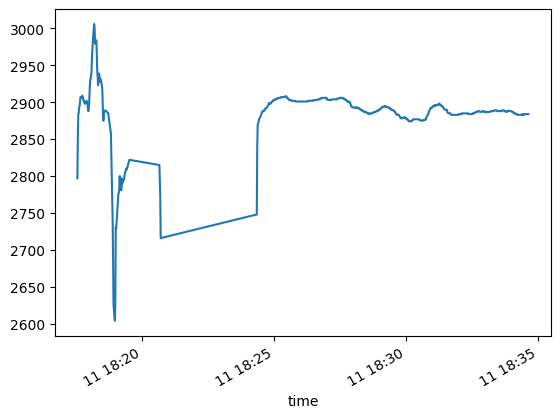

<Axes: >

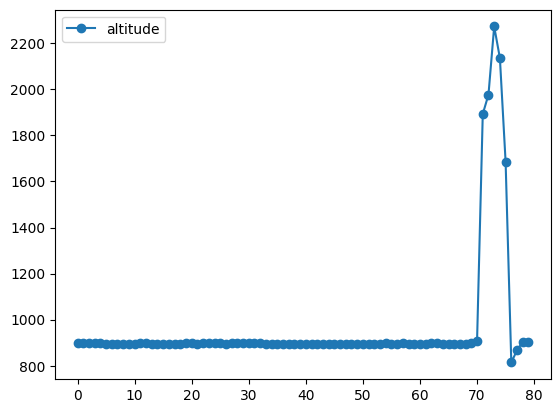

In [58]:
loradf[['altitude']].plot(marker='o')